# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
def calc_means_and_stdevs(y, tau):
    means = np.cumsum(y, dtype=np.float)
    stdevs = np.cumsum(np.square(y), dtype=np.float)
    
    means[tau:] = means[tau:] - means[:-tau]
    means = means[tau-1:] / tau
    
    stdevs[tau:] = stdevs[tau:] - stdevs[:-tau]
    stdevs = stdevs[tau-1:] / tau - np.square(means)
    stdevs = np.sqrt(stdevs)
    return means, stdevs

def plot_compare(ys, legend, tau, x_scale=1, y_scale=1, figsize=(8, 5)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for y in ys:
        means, stdevs = calc_means_and_stdevs(y, tau)
        lower = means - stdevs
        upper = means + stdevs
        x = np.arange(means.size) / x_scale
        p = ax.plot(x, means)
        ax.fill_between(x, lower, means, alpha=0.2, where=lower <= means, color=p[0].get_color())
        ax.fill_between(x, upper, means, alpha=0.2, where=upper >= means, color=p[0].get_color())
    ax.set_xlabel("Number of episodes, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    ax.legend(legend, fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()

def plot_means_and_stdevs(y, tau, x_scale=1, y_scale=1, figsize=(8, 5), color='dodgerblue', save=False):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    y = np.array(y) * y_scale

    means, stdevs = calc_means_and_stdevs(y, tau)
    lower = means - stdevs
    upper = means + stdevs
    
    x = np.arange(means.size) / x_scale
    
    ax.plot(x, means, color=color)
    ax.fill_between(x, lower, means, alpha=0.2, where=lower <= means, facecolor=color)
    ax.fill_between(x, upper, means, alpha=0.2, where=upper >= means, facecolor=color)
    
    ax.set_xlabel("Number of env steps, "+r"$10^3$", fontsize=18)
    ax.set_ylabel("Reward", fontsize=18)
    
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(18) 
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(18)
    for (i, spine) in enumerate(plt.gca().spines.values()):
        if i%2 != 0: spine.set_visible(False)    
    ax.grid()
    
    if save:
        fig.savefig('results/prosthetics.png', dpi=300, bbox_inches='tight')
    
def average_rewards(logpaths):
    r_logs = [np.loadtxt(logpath) for logpath in logpaths]
    log_lengths = [r_log.shape[0] for r_log in r_logs]
    log_min_length = np.min(log_lengths)
    r_logs = [r_log[:log_min_length, 2] for r_log in r_logs]
    return np.mean(r_logs, axis=0)

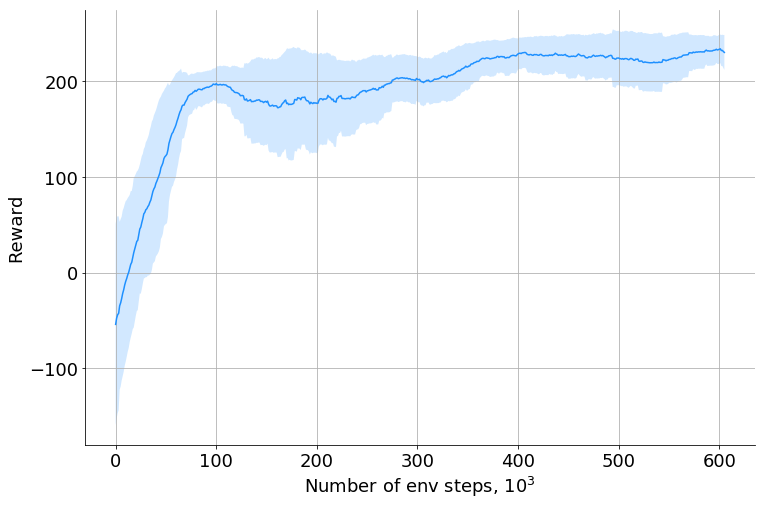

In [19]:
r_ddpg = average_rewards([
    'logs/lunar_lander_ddpg_seed_42/rewards-test-1.txt',
    'logs/lunar_lander_ddpg_seed_43/rewards-test-1.txt',
    'logs/lunar_lander_ddpg_seed_44/rewards-test-1.txt'
])
plot_means_and_stdevs(r_ddpg, tau=50, figsize=(12, 8), x_scale=1, y_scale=1, save=False)

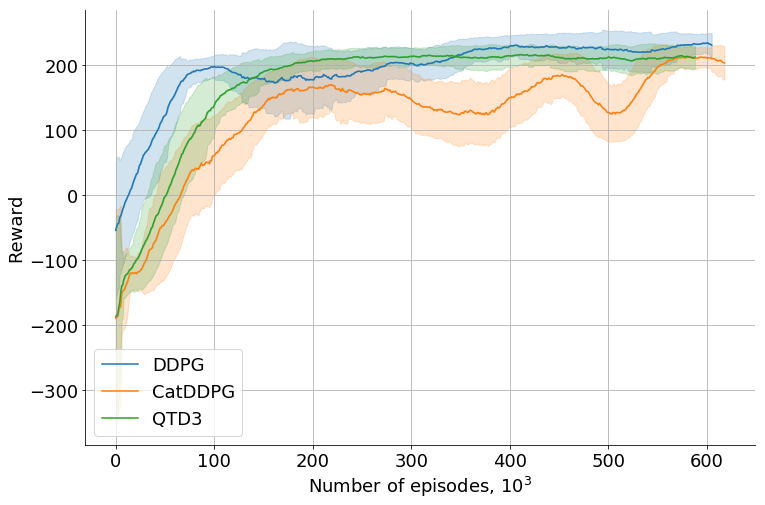

In [20]:
r_cat_ddpg = average_rewards([
    'logs/lunar_lander_cat_ddpg_seed_42/rewards-test-1.txt',
    'logs/lunar_lander_cat_ddpg_seed_43/rewards-test-1.txt',
    'logs/lunar_lander_cat_ddpg_seed_44/rewards-test-1.txt',
])

r_qtd3 = average_rewards([
    'logs/lunar_lander_qtd3_seed_42/rewards-test-1.txt',
    'logs/lunar_lander_qtd3_seed_43/rewards-test-1.txt',
    'logs/lunar_lander_qtd3_seed_44/rewards-test-1.txt',
])

plot_compare(
    [r_ddpg, r_cat_ddpg, r_qtd3],
    ['DDPG', 'CatDDPG', 'QTD3'],
    figsize=(12, 8),
    tau=50
)